In [1]:
import qp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from nested_pandas import NestedFrame

## Read the object catlaog

In [34]:
root_dir = "/sdf/data/rubin/shared/lsdb_commissioning/ecdfs-objects"
cat_path = os.path.join(root_dir, "galaxy_objects_curated_cds.pq")
fzboost_path = os.path.join(root_dir, "output_FZBoost.hdf5")
output_path = "/sdf/data/rubin/shared/lsdb_commissioning/sean_test/fzboost_curated_pdf"

In [3]:
object_cat = pd.read_parquet(cat_path)

In [4]:
object_cat.columns

Index(['i_ra', 'i_dec', 'u_cModelFlux', 'u_cModelFluxErr', 'g_cModelFlux',
       'g_cModelFluxErr', 'r_cModelFlux', 'r_cModelFluxErr', 'i_cModelFlux',
       'i_cModelFluxErr', 'z_cModelFlux', 'z_cModelFluxErr', 'y_cModelFlux',
       'y_cModelFluxErr', 'u_cModelMag', 'u_cModelMagErr', 'g_cModelMag',
       'g_cModelMagErr', 'r_cModelMag', 'r_cModelMagErr', 'i_cModelMag',
       'i_cModelMagErr', 'z_cModelMag', 'z_cModelMagErr', 'y_cModelMag',
       'y_cModelMagErr', 'ebv'],
      dtype='object', name='column')

## Read the RAIL output 

In [6]:
fzboost_qp = qp.read(fzboost_path)

In [7]:
# number of objects is the same

fzboost_qp.npdf

np.int64(131368)

In [8]:
# get mode, mean, median

zmode = fzboost_qp.ancil['zmode']
zmedian = fzboost_qp.ancil['zmedian']
zmean = fzboost_qp.mean()


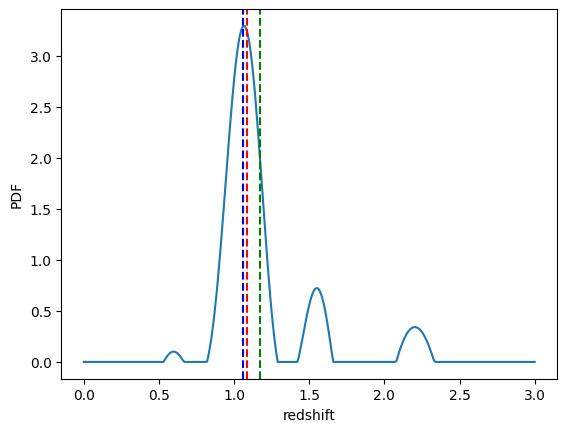

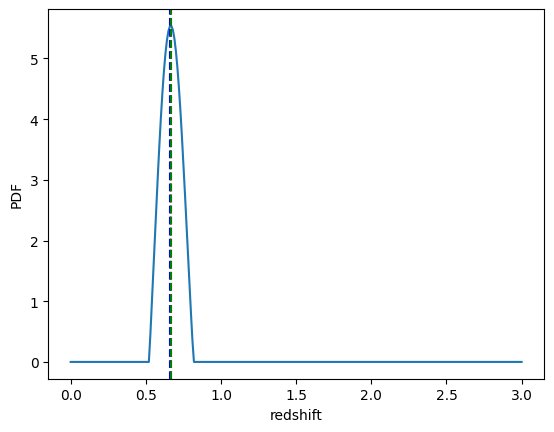

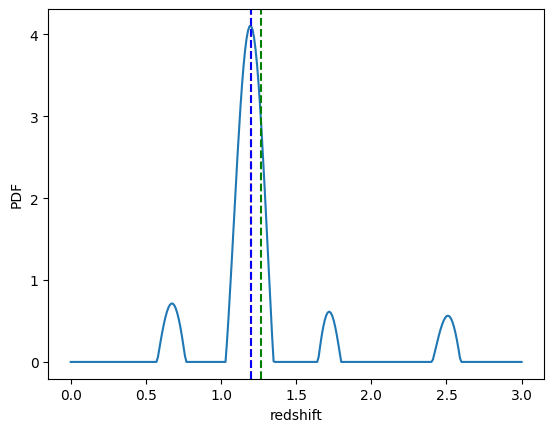

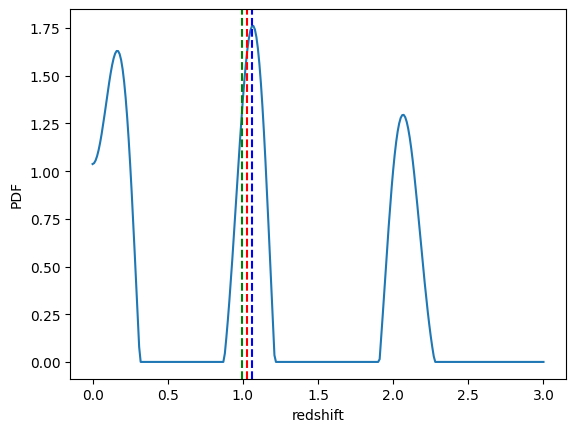

In [9]:
# get the pdf of a specific galaxy

# i = 1337

for i in [1337, 1000, 3, 3413]:

    zgrid = np.linspace(0,3,301)
    pdf_example = fzboost_qp[i].pdf(zgrid)

    plt.plot(zgrid, pdf_example[0])
    plt.axvline(x=zmedian[i], color='r', linestyle='--', linewidth=1.5)
    plt.axvline(x=zmode[i], color='b', linestyle='--', linewidth=1.5)
    plt.axvline(x=zmean[i], color='g', linestyle='--', linewidth=1.5)
    plt.xlabel('redshift')
    plt.ylabel('PDF')
    plt.show()

In [10]:
zmedian

array([[2.87027315],
       [1.1152161 ],
       [0.69005011],
       ...,
       [0.97161283],
       [0.68490605],
       [1.24042757]])

In [11]:
fzboost_qp.shape[0]

131368

In [12]:
lin_array = np.linspace(0,3,301)
tiled_array = np.tile(lin_array, (fzboost_qp.shape[0], 1))
zarray = fzboost_qp.pdf(tiled_array)
zarray

array([[0.        , 0.        , 0.        , ..., 4.65961763, 4.71305945,
        4.73097424],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01136911, 0.01973607, 0.04515385, ..., 0.41810837, 0.41954479,
        0.42001773],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
zarray.astype(np.float32)

array([[0.        , 0.        , 0.        , ..., 4.65961763, 4.71305945,
        4.73097424],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01136911, 0.01973607, 0.04515385, ..., 0.41810837, 0.41954479,
        0.42001773],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
import pyarrow as pa
arrow_series = pd.Series(pa.array(zarray.astype(np.float32).tolist(), type=pa.list_(pa.float32())), dtype=pd.ArrowDtype(pa.list_(pa.float32())), index=object_cat.index)

In [25]:
arrow_series.dtype

list<item: float>[pyarrow]

In [15]:
arrow_series.dtype

dtype('O')

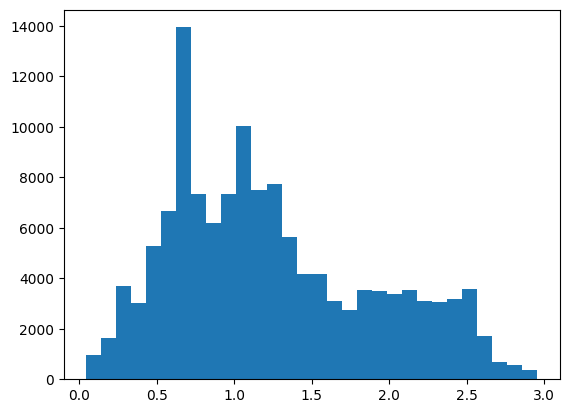

In [26]:
plt.hist(zmedian, bins = 30)
plt.show()

In [30]:
import lsdb

In [ ]:
object_cat["zmedian"] = zmedian
object_cat["zmode"] = zmode
object_cat["zmean"] = zmean
object_cat["zpdf"] = arrow_series

In [31]:
cat = lsdb.from_dataframe(object_cat, ra_column="i_ra", dec_column="i_dec")

In [32]:
cat

,objectId,i_ra,i_dec,u_cModelFlux,u_cModelFluxErr,g_cModelFlux,g_cModelFluxErr,r_cModelFlux,r_cModelFluxErr,i_cModelFlux,i_cModelFluxErr,z_cModelFlux,z_cModelFluxErr,y_cModelFlux,y_cModelFluxErr,u_cModelMag,u_cModelMagErr,g_cModelMag,g_cModelMagErr,r_cModelMag,r_cModelMagErr,i_cModelMag,i_cModelMagErr,z_cModelMag,z_cModelMagErr,y_cModelMag,y_cModelMagErr,ebv,zmedian,zmode,zmean,zpdf
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 0, Pixel: 8",int64[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],float[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],list<item: float>[pyarrow]


(<Figure size 900x500 with 1 Axes>,
 <WCSAxes: title={'center': 'Coverage MOC of from_lsdb_dataframe'}>)

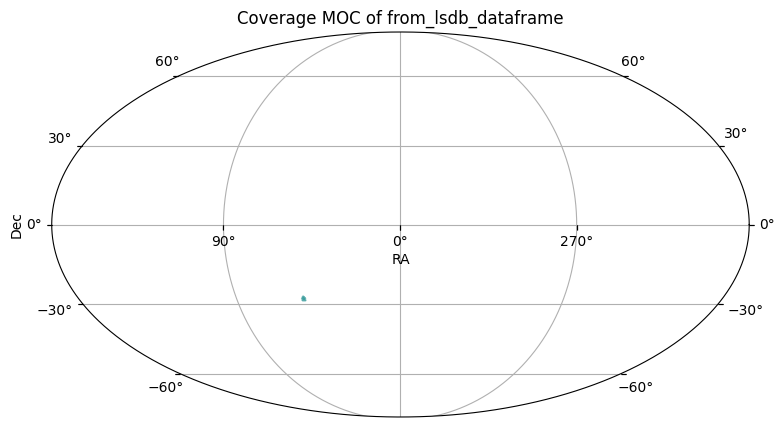

In [33]:
cat.plot_coverage()

In [35]:
cat.to_hats(output_path, overwrite=True)

In [36]:
output_path

'/sdf/data/rubin/shared/lsdb_commissioning/sean_test/fzboost_curated_pdf'